In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('emission_full.csv')
df

,country_name,year,GHG_emissions,CH4_emissions,N2O_emissions,F_Gas_emissions,CO2_emissions,CH4_emissions.1,N2O_emissions.1,energy_emissions,...,electricity_heat_emissions,construction_emissions,transports_emissions,other_fuels_emissions,other_emissions,subregion,region-wb,continent,iso-a3,iso-a2
0,Afghanistan,1990,15.212848,9.311589,2.984055,0.002180,2.915024,9.311589,2.984055,3.774044,...,NaN,NaN,NaN,NaN,1.242220,Southern Asia,South Asia,Asia,AFG,AF
1,Afghanistan,1991,15.286439,9.516187,3.082194,0.003613,2.684445,9.516187,3.082194,3.376803,...,NaN,NaN,NaN,NaN,1.020851,Southern Asia,South Asia,Asia,AFG,AF
2,Afghanistan,1992,14.010531,9.571483,3.041733,0.005046,1.392269,9.571483,3.041733,1.914300,...,NaN,NaN,NaN,NaN,0.602588,Southern Asia,South Asia,Asia,AFG,AF
3,Afghanistan,1993,14.028118,9.609869,3.089066,0.006479,1.322704,9.609869,3.089066,1.678073,...,NaN,NaN,NaN,NaN,0.413993,Southern Asia,South Asia,Asia,AFG,AF
4,Afghanistan,1994,13.985408,9.789039,2.920713,0.007912,1.267744,9.789039,2.920713,1.456451,...,NaN,NaN,NaN,NaN,0.247331,Southern Asia,South Asia,Asia,AFG,AF
5,Afghanistan,1995,14.334937,10.057814,3.047666,0.009344,1.220112,10.057814,3.047666,1.242156,...,NaN,NaN,NaN,NaN,0.080668,Southern Asia,South Asia,Asia,AFG,AF
6,Afghanistan,1996,15.323211,10.864798,3.286952,0.017301,1.154160,10.864798,3.286952,1.179521,...,NaN,NaN,NaN,NaN,0.083985,Southern Asia,South Asia,Asia,AFG,AF
7,Afghanistan,1997,16.284527,11.578103,3.611278,0.025258,1.069888,11.578103,3.611278,1.098565,...,NaN,NaN,NaN,NaN,0.087301,Southern Asia,South Asia,Asia,AFG,AF
8,Afghanistan,1998,17.124436,12.155188,3.921105,0.033215,1.014928,12.155188,3.921105,1.046922,...,NaN,NaN,NaN,NaN,0.090618,Southern Asia,South Asia,Asia,AFG,AF
9,Afghanistan,1999,18.000555,12.950226,4.210406,0.041172,0.798752,12.950226,4.210406,0.834063,...,NaN,NaN,NaN,NaN,0.093935,Southern Asia,South Asia,Asia,AFG,AF


In [3]:
df.columns

Index(['country_name', 'year', 'GHG_emissions', 'CH4_emissions',
       'N2O_emissions', 'F_Gas_emissions', 'CO2_emissions', 'CH4_emissions.1',
       'N2O_emissions.1', 'energy_emissions', 'industry_emissions',
       'agriculture_emissions', 'waste_emissions',
       'land_use_foresty_emissions', 'bunker_fuels_emissions',
       'electricity_heat_emissions', 'construction_emissions',
       'transports_emissions', 'other_fuels_emissions', 'other_emissions',
       'subregion', 'region-wb', 'continent', 'iso-a3', 'iso-a2'],
      dtype='object')

In [4]:
df_pca = df.drop(['GHG_emissions','CH4_emissions','N2O_emissions','F_Gas_emissions','CO2_emissions','CH4_emissions.1',
              'N2O_emissions.1'],axis=1)
df_pca

,country_name,year,energy_emissions,industry_emissions,agriculture_emissions,waste_emissions,land_use_foresty_emissions,bunker_fuels_emissions,electricity_heat_emissions,construction_emissions,transports_emissions,other_fuels_emissions,other_emissions,subregion,region-wb,continent,iso-a3,iso-a2
0,Afghanistan,1990,3.774044,0.057140,7.342710,4.038954,0.000000,NaN,NaN,NaN,NaN,NaN,1.242220,Southern Asia,South Asia,Asia,AFG,AF
1,Afghanistan,1991,3.376803,0.058573,7.631027,4.220036,0.000000,NaN,NaN,NaN,NaN,NaN,1.020851,Southern Asia,South Asia,Asia,AFG,AF
2,Afghanistan,1992,1.914300,0.063670,7.631443,4.401118,0.000000,NaN,NaN,NaN,NaN,NaN,0.602588,Southern Asia,South Asia,Asia,AFG,AF
3,Afghanistan,1993,1.678073,0.065103,7.702742,4.582200,0.000000,NaN,NaN,NaN,NaN,NaN,0.413993,Southern Asia,South Asia,Asia,AFG,AF
4,Afghanistan,1994,1.456451,0.066536,7.699139,4.763283,0.000000,NaN,NaN,NaN,NaN,NaN,0.247331,Southern Asia,South Asia,Asia,AFG,AF
5,Afghanistan,1995,1.242156,0.067968,8.080447,4.944365,0.000000,NaN,NaN,NaN,NaN,NaN,0.080668,Southern Asia,South Asia,Asia,AFG,AF
6,Afghanistan,1996,1.179521,0.075925,8.969350,5.098415,0.000000,NaN,NaN,NaN,NaN,NaN,0.083985,Southern Asia,South Asia,Asia,AFG,AF
7,Afghanistan,1997,1.098565,0.083882,9.849614,5.252466,0.000000,NaN,NaN,NaN,NaN,NaN,0.087301,Southern Asia,South Asia,Asia,AFG,AF
8,Afghanistan,1998,1.046922,0.091839,10.579159,5.406516,0.000000,NaN,NaN,NaN,NaN,NaN,0.090618,Southern Asia,South Asia,Asia,AFG,AF
9,Afghanistan,1999,0.834063,0.099796,11.506130,5.560567,0.000000,NaN,NaN,NaN,NaN,NaN,0.093935,Southern Asia,South Asia,Asia,AFG,AF


In [5]:
df_pca = df_pca.drop(['country_name','year','subregion','region-wb','continent','iso-a3','iso-a2'],axis=1)
df_pca

,energy_emissions,industry_emissions,agriculture_emissions,waste_emissions,land_use_foresty_emissions,bunker_fuels_emissions,electricity_heat_emissions,construction_emissions,transports_emissions,other_fuels_emissions,other_emissions
0,3.774044,0.057140,7.342710,4.038954,0.000000,NaN,NaN,NaN,NaN,NaN,1.242220
1,3.376803,0.058573,7.631027,4.220036,0.000000,NaN,NaN,NaN,NaN,NaN,1.020851
2,1.914300,0.063670,7.631443,4.401118,0.000000,NaN,NaN,NaN,NaN,NaN,0.602588
3,1.678073,0.065103,7.702742,4.582200,0.000000,NaN,NaN,NaN,NaN,NaN,0.413993
4,1.456451,0.066536,7.699139,4.763283,0.000000,NaN,NaN,NaN,NaN,NaN,0.247331
5,1.242156,0.067968,8.080447,4.944365,0.000000,NaN,NaN,NaN,NaN,NaN,0.080668
6,1.179521,0.075925,8.969350,5.098415,0.000000,NaN,NaN,NaN,NaN,NaN,0.083985
7,1.098565,0.083882,9.849614,5.252466,0.000000,NaN,NaN,NaN,NaN,NaN,0.087301
8,1.046922,0.091839,10.579159,5.406516,0.000000,NaN,NaN,NaN,NaN,NaN,0.090618
9,0.834063,0.099796,11.506130,5.560567,0.000000,NaN,NaN,NaN,NaN,NaN,0.093935


In [6]:
df_pca = df_pca.fillna(0)
df_pca

,energy_emissions,industry_emissions,agriculture_emissions,waste_emissions,land_use_foresty_emissions,bunker_fuels_emissions,electricity_heat_emissions,construction_emissions,transports_emissions,other_fuels_emissions,other_emissions
0,3.774044,0.057140,7.342710,4.038954,0.000000,0.00,0.00,0.00,0.00,0.000000,1.242220
1,3.376803,0.058573,7.631027,4.220036,0.000000,0.00,0.00,0.00,0.00,0.000000,1.020851
2,1.914300,0.063670,7.631443,4.401118,0.000000,0.00,0.00,0.00,0.00,0.000000,0.602588
3,1.678073,0.065103,7.702742,4.582200,0.000000,0.00,0.00,0.00,0.00,0.000000,0.413993
4,1.456451,0.066536,7.699139,4.763283,0.000000,0.00,0.00,0.00,0.00,0.000000,0.247331
5,1.242156,0.067968,8.080447,4.944365,0.000000,0.00,0.00,0.00,0.00,0.000000,0.080668
6,1.179521,0.075925,8.969350,5.098415,0.000000,0.00,0.00,0.00,0.00,0.000000,0.083985
7,1.098565,0.083882,9.849614,5.252466,0.000000,0.00,0.00,0.00,0.00,0.000000,0.087301
8,1.046922,0.091839,10.579159,5.406516,0.000000,0.00,0.00,0.00,0.00,0.000000,0.090618
9,0.834063,0.099796,11.506130,5.560567,0.000000,0.00,0.00,0.00,0.00,0.000000,0.093935


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_pca)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components= df_pca.shape[1])

pc = pca.fit_transform(X_scaled)

In [9]:
eigen_values = pca.explained_variance_

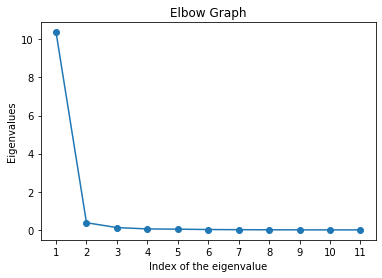

In [10]:
#elbow graph

possibilities = range(1, 12)

plt.plot(possibilities, eigen_values, '-o')
plt.xlabel('Index of the eigenvalue')
plt.ylabel('Eigenvalues')
plt.xticks(possibilities)
plt.title('Elbow Graph')
plt.show()

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94220491, 0.97654138, 0.98768955, 0.99241202, 0.99606247,
       0.99790667, 0.99895881, 0.99957666, 0.99983779, 0.99999999,
       1.        ])

In [12]:
pca = PCA(n_components= 2)

pc = pca.fit_transform(X_scaled)

In [13]:
pca.components_

array([[ 0.30940126,  0.29747097,  0.306692  ,  0.3089903 ,  0.26056236,
         0.30084706,  0.30772539,  0.30289501,  0.30625047,  0.30707904,
         0.30547995],
       [ 0.12582064,  0.32893476, -0.134513  , -0.0617989 , -0.8668598 ,
         0.07233351,  0.19003035,  0.2308784 ,  0.05022211,  0.0185647 ,
        -0.07139269]])

In [14]:
(pca.components_.T * np.sqrt(pca.explained_variance_)).T

array([[ 0.99617608,  0.95776425,  0.9874531 ,  0.99485291,  0.83892996,
         0.96863423,  0.99078032,  0.97522799,  0.98603153,  0.98869927,
         0.98355068],
       [ 0.0773341 ,  0.20217569, -0.08267675, -0.03798393, -0.53280468,
         0.0444589 ,  0.11679981,  0.14190656,  0.0308684 ,  0.01141057,
        -0.04388064]])

Not good lol

In [15]:
import statsmodels.api as sm # this loads statsmodels

In [16]:
df_reg = df_pca

In [17]:
target = df['GHG_emissions']

In [18]:
df_target = df_reg.merge(target, left_index = True, right_index = True)

In [19]:
df_target.corr()

,energy_emissions,industry_emissions,agriculture_emissions,waste_emissions,land_use_foresty_emissions,bunker_fuels_emissions,electricity_heat_emissions,construction_emissions,transports_emissions,other_fuels_emissions,other_emissions,GHG_emissions
energy_emissions,1.000000,0.966868,0.974834,0.986844,0.793893,0.964534,0.998239,0.980711,0.988193,0.986603,0.978546,0.999502
industry_emissions,0.966868,1.000000,0.925491,0.937059,0.716994,0.914929,0.974774,0.988270,0.930169,0.927165,0.923475,0.967190
agriculture_emissions,0.974834,0.925491,1.000000,0.989173,0.867121,0.946148,0.963983,0.954943,0.963703,0.981191,0.970483,0.980764
waste_emissions,0.986844,0.937059,0.989173,1.000000,0.848893,0.962709,0.977879,0.961432,0.979472,0.988687,0.980410,0.989835
land_use_foresty_emissions,0.793893,0.716994,0.867121,0.848893,1.000000,0.779128,0.771431,0.756052,0.801981,0.812353,0.841172,0.804997
bunker_fuels_emissions,0.964534,0.914929,0.946148,0.962709,0.779128,1.000000,0.958124,0.923220,0.974232,0.962713,0.941123,0.964217
electricity_heat_emissions,0.998239,0.974774,0.963983,0.977879,0.771431,0.958124,1.000000,0.982688,0.983361,0.977142,0.971828,0.996840
construction_emissions,0.980711,0.988270,0.954943,0.961432,0.756052,0.923220,0.982688,1.000000,0.942378,0.958481,0.945878,0.982071
transports_emissions,0.988193,0.930169,0.963703,0.979472,0.801981,0.974232,0.983361,0.942378,1.000000,0.978994,0.970332,0.986501
other_fuels_emissions,0.986603,0.927165,0.981191,0.988687,0.812353,0.962713,0.977142,0.958481,0.978994,1.000000,0.968841,0.987664


In [20]:
#Load 'statsmodels.formula.spi' so a constant is automatically added to the data and an intercept in fitted.
import statsmodels.formula.api as smf
#Load 'summary_col' to help us summarize multiple results instances side-by-side.
from statsmodels.iolib.summary2 import summary_col

#We will do a linear regression for each of the X variables, one at a time, then pick the X variable that had the highest R2.
#Next we will do a multiple regression with the X variable from step 1 and each of the other X variables.
#We will add the X variable that increases the R2 by the greatest amount.
#We continue adding X variables until adding another X variable does not significantly increase the R2.

m1 = smf.ols('GHG_emissions ~ energy_emissions', data = df_target).fit()
m2 = smf.ols('GHG_emissions ~ industry_emissions', data = df_target).fit()
m3 = smf.ols('GHG_emissions ~ agriculture_emissions', data = df_target).fit()
m4 = smf.ols('GHG_emissions ~ waste_emissions', data = df_target).fit()
m5 = smf.ols('GHG_emissions ~ land_use_foresty_emissions', data = df_target).fit()
m6 = smf.ols('GHG_emissions ~ bunker_fuels_emissions', data = df_target).fit()
m7 = smf.ols('GHG_emissions ~ electricity_heat_emissions', data = df_target).fit()
m8 = smf.ols('GHG_emissions ~ construction_emissions', data = df_target).fit()
m9 = smf.ols('GHG_emissions ~ transports_emissions', data = df_target).fit()
m10 = smf.ols('GHG_emissions ~ other_fuels_emissions', data = df_target).fit()
m11 = smf.ols('GHG_emissions ~ other_emissions', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,GHG_emissions I,GHG_emissions II,GHG_emissions III,GHG_emissions IIII,GHG_emissions IIIII,GHG_emissions IIIIII,GHG_emissions IIIIIII,GHG_emissions IIIIIIII,GHG_emissions IIIIIIIII,GHG_emissions IIIIIIIIII,GHG_emissions IIIIIIIIIII
Intercept,3.1832,37.9827,-1.7782,-10.5852,121.6214,2.3216,6.4432,21.4009,28.7353,-15.2104,12.5508
,(1.2667),(10.1898),(7.8431),(5.7160),(23.7637),(10.6540),(3.1892),(7.5651),(6.5688),(6.2954),(8.0963)
agriculture_emissions,,,7.6327,,,,,,,,
,,,(0.0220),,,,,,,,
bunker_fuels_emissions,,,,,,38.2295,,,,,
,,,,,,(0.1520),,,,,
construction_emissions,,,,,,,,7.4409,,,
,,,,,,,,(0.0207),,,
electricity_heat_emissions,,,,,,,3.0443,,,,
,,,,,,,(0.0035),,,,


In [21]:
#energy_emissions had the highest R2.

m1 = smf.ols('GHG_emissions ~ energy_emissions + agriculture_emissions', data = df_target).fit()
m2 = smf.ols('GHG_emissions ~ energy_emissions + bunker_fuels_emissions', data = df_target).fit()
m3 = smf.ols('GHG_emissions ~ energy_emissions + construction_emissions', data = df_target).fit()
m4 = smf.ols('GHG_emissions ~ energy_emissions + electricity_heat_emissions', data = df_target).fit()
m5 = smf.ols('GHG_emissions ~ energy_emissions + industry_emissions', data = df_target).fit()
m6 = smf.ols('GHG_emissions ~ energy_emissions + land_use_foresty_emissions', data = df_target).fit()
m7 = smf.ols('GHG_emissions ~ energy_emissions + other_emissions', data = df_target).fit()
m8 = smf.ols('GHG_emissions ~ energy_emissions + other_fuels_emissions', data = df_target).fit()
m9 = smf.ols('GHG_emissions ~ energy_emissions + transports_emissions', data = df_target).fit()
m10 = smf.ols('GHG_emissions ~ energy_emissions + waste_emissions', data = df_target).fit()

summary_col([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,GHG_emissions I,GHG_emissions II,GHG_emissions III,GHG_emissions IIII,GHG_emissions IIIII,GHG_emissions IIIIII,GHG_emissions IIIIIII,GHG_emissions IIIIIIII,GHG_emissions IIIIIIIII,GHG_emissions IIIIIIIIII
Intercept,0.2728,3.1121,3.3736,2.7939,3.3036,2.2602,2.9524,1.5107,2.3640,0.1234
,(0.5177),(1.2675),(1.2084),(1.1103),(1.2605),(1.0126),(1.2370),(1.2101),(1.2281),(0.9263)
agriculture_emissions,1.0051,,,,,,,,,
,(0.0065),,,,,,,,,
bunker_fuels_emissions,,0.0962,,,,,,,,
,,(0.0685),,,,,,,,
construction_emissions,,,0.3671,,,,,,,
,,,(0.0169),,,,,,,
electricity_heat_emissions,,,,-0.7818,,,,,,
,,,,(0.0206),,,,,,
